<h1><center>Adults Dataset</center></h1>

# Machine Learning 1 - Mini-Project: SVM & LR Classification

### Authors:
Richard Kim <br> Connor Dobbs<br> Joaquin Dominguez

## Create Models

### Load and Prepare Dataset
The same dataset as Lab 1 will be used, with modifications being made for this mini-lab.

Much of the code for creating and assessing models was learnt from the class notebook 04. Logits and SVM. 

In [36]:
### Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hide deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [37]:
### Import dataset into 'df'
df = pd.read_csv('https://raw.githubusercontent.com/j-dominguez9/ML1_Proj1/main/Data/census_clean.csv')

In [38]:
## check types, get overview
df.info()

#double check nulls
df.isna().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45175 entries, 0 to 45174
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       45175 non-null  int64 
 1   age              45175 non-null  int64 
 2   workclass        45175 non-null  object
 3   fnlwgt           45175 non-null  int64 
 4   education        45175 non-null  object
 5   educational-num  45175 non-null  int64 
 6   marital-status   45175 non-null  object
 7   occupation       45175 non-null  object
 8   relationship     45175 non-null  object
 9   race             45175 non-null  object
 10  gender           45175 non-null  object
 11  capital-gain     45175 non-null  int64 
 12  capital-loss     45175 non-null  int64 
 13  hours-per-week   45175 non-null  int64 
 14  native-country   45175 non-null  object
 15  income           45175 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Prepare Dataset for Logistic Regression
In this step, we transformed all categorical variables (via OneHotEncoding method) to prepare the data for logistic regression. Note that in further modeling, these categorical variables will be refined further. 

In [39]:
# create dummy var for income

dummy = pd.get_dummies(df['income'])

df_1 = pd.concat((df, dummy), axis=1)

df_1 = df_1.drop(['income'], axis=1)

df_1 = df_1.drop(['<=50K'], axis=1)

df_1 = df_1.rename(columns={'>50K': 'income'})


In [40]:
# OneHotEncoding workclass variable
dummy = pd.get_dummies(df['workclass'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['workclass'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,25,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,0,0,0,1,0,0,0,0
1,1,38,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,0,0,0,1,0,0,0,0
2,2,28,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,1,0,1,0,0,0,0,0
3,3,44,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,1,0,0,1,0,0,0,0
4,5,34,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,30,United-States,0,0,0,1,0,0,0,0


In [41]:
# OneHotEncoding gender variable
dummy = pd.get_dummies(df['gender'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['gender'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,...,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male
0,0,25,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,...,0,0,0,1,0,0,0,0,0,1
1,1,38,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,...,0,0,0,1,0,0,0,0,0,1
2,2,28,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,...,1,0,1,0,0,0,0,0,0,1
3,3,44,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,...,1,0,0,1,0,0,0,0,0,1
4,5,34,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,...,0,0,0,1,0,0,0,0,0,1


In [42]:
# OneHotEncoding education var
dummy = pd.get_dummies(df['education'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['education'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,25,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,28,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,44,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,...,0,0,0,0,0,0,0,0,0,1
4,5,34,198693,6,Never-married,Other-service,Not-in-family,White,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#OneHotEncoding marital-status var
dummy = pd.get_dummies(df['marital-status'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['marital-status'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,...,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,25,226802,7,Machine-op-inspct,Own-child,Black,0,0,40,...,0,0,0,0,0,0,0,1,0,0
1,1,38,89814,9,Farming-fishing,Husband,White,0,0,50,...,0,0,0,0,0,1,0,0,0,0
2,2,28,336951,12,Protective-serv,Husband,White,0,0,40,...,0,0,0,0,0,1,0,0,0,0
3,3,44,160323,10,Machine-op-inspct,Husband,Black,7688,0,40,...,0,0,1,0,0,1,0,0,0,0
4,5,34,198693,6,Other-service,Not-in-family,White,0,0,30,...,0,0,0,0,0,0,0,1,0,0


In [44]:
#OneHotEncoding occupation var
dummy = pd.get_dummies(df['occupation'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['occupation'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,25,226802,7,Own-child,Black,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,1,38,89814,9,Husband,White,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,2,28,336951,12,Husband,White,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,3,44,160323,10,Husband,Black,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,5,34,198693,6,Not-in-family,White,0,0,30,United-States,...,0,0,0,1,0,0,0,0,0,0


In [45]:
#OneHotEncoding relationship var
dummy = pd.get_dummies(df['relationship'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['relationship'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,race,capital-gain,capital-loss,hours-per-week,native-country,income,...,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,25,226802,7,Black,0,0,40,United-States,0,...,0,0,0,0,0,0,0,1,0,0
1,1,38,89814,9,White,0,0,50,United-States,0,...,0,0,0,0,1,0,0,0,0,0
2,2,28,336951,12,White,0,0,40,United-States,1,...,1,0,0,0,1,0,0,0,0,0
3,3,44,160323,10,Black,7688,0,40,United-States,1,...,0,0,0,0,1,0,0,0,0,0
4,5,34,198693,6,White,0,0,30,United-States,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
#OneHotEncoding race var
dummy = pd.get_dummies(df['race'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['race'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,25,226802,7,0,0,40,United-States,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,38,89814,9,0,0,50,United-States,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,28,336951,12,0,0,40,United-States,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3,44,160323,10,7688,0,40,United-States,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,34,198693,6,0,0,30,United-States,0,0,...,1,0,0,0,0,0,0,0,0,1


In [47]:
#OneHotEncoding native-country var
dummy = pd.get_dummies(df['native-country'])

df_1 = pd.concat((df_1, dummy), axis=1)

df_1 = df_1.drop(['native-country'], axis=1)

df_1.head()

,Unnamed: 0,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,25,226802,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,38,89814,9,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,28,336951,12,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3,44,160323,10,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,34,198693,6,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
### verify all variables have correct type

df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45175 entries, 0 to 45174
Data columns (total 106 columns):
 #   Column                      Dtype
---  ------                      -----
 0   Unnamed: 0                  int64
 1   age                         int64
 2   fnlwgt                      int64
 3   educational-num             int64
 4   capital-gain                int64
 5   capital-loss                int64
 6   hours-per-week              int64
 7   income                      uint8
 8   Federal-gov                 uint8
 9   Local-gov                   uint8
 10  Private                     uint8
 11  Self-emp-inc                uint8
 12  Self-emp-not-inc            uint8
 13  State-gov                   uint8
 14  Without-pay                 uint8
 15  Female                      uint8
 16  Male                        uint8
 17  10th                        uint8
 18  11th                        uint8
 19  12th                        uint8
 20  1st-4th                    

### Split Dataset
In this step, we apply a 80/20 split to create a train and test set.

In [49]:
### import relevant function
from sklearn.model_selection import ShuffleSplit

### create copy of dataset to work on
df_2 = df_1.copy()

### acquire target label values, delete column of said acquired values, and assign remaining variables and corresponding values to 'X'

if 'income' in df_1:
    y = df_2['income'].values 
    del df_2['income'] 
    X = df_2.values 


### split data 80/20 with 10 cross-validation
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


### Create Logisitic Regression Model
In this section, we build the logistic regression model from the training set created in the previous section. First, we create a logistic regression object under 'lr_clf,' which can have different parameters and constants applied. A confusion matrix allows us to see the performance of each iteration, as outlined in the previous section ('iter_num').

In [50]:
### import relevant packages for building LR Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


### create LR object and apply parameters and consants

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.7938018815716658
confusion matrix
 [[6588  229]
 [1634  584]]
====Iteration 1  ====
accuracy 0.7923630326508024
confusion matrix
 [[6584  222]
 [1654  575]]
====Iteration 2  ====
accuracy 0.7879358052019922
confusion matrix
 [[6552  235]
 [1681  567]]
====Iteration 3  ====
accuracy 0.7953514111787493
confusion matrix
 [[6578  239]
 [1610  608]]
====Iteration 4  ====
accuracy 0.7963475373547316
confusion matrix
 [[6627  224]
 [1616  568]]
====Iteration 5  ====
accuracy 0.7870503597122303
confusion matrix
 [[6555  240]
 [1684  556]]
====Iteration 6  ====
accuracy 0.7862755949086885
confusion matrix
 [[6499  228]
 [1703  605]]
====Iteration 7  ====
accuracy 0.7916989485334809
confusion matrix
 [[6587  210]
 [1672  566]]
====Iteration 8  ====
accuracy 0.7933591588267848
confusion matrix
 [[6605  256]
 [1611  563]]
====Iteration 9  ====
accuracy 0.7870503597122303
confusion matrix
 [[6560  262]
 [1662  551]]


The following section allows us to get a glimpse of the accuracies found via iterations above. We can see performance hovers around 79% accuracy. 

In [51]:
# accuracies
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.78483675 0.79346984 0.79247371 0.79335916 0.78859989 0.79579413
 0.7833979  0.79701162 0.79247371 0.79391256]


## Logistic Regression - Parameter Adjustment

Having an interactive slider allows us to see in real-time the effect of manipulating parameters on the accuracies of all 10 iterations. For logistic regression, the best available parameter to try adjusting is that of the cost function used. However we can see that no value provides much different performance, and so the initial value tried of 1 can be kept.

In [52]:
### create interactive parameter slider
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

## Interpreting Feature Importance via Weights
In order to practically interpret the weights for the model, we first have to normalize the attributes. Once normalized, the weights should reflect their predictive value.

We also find that standardizing and scaling improves model accuracy to around 84%. 

### Top 5 Most Important Variables

1. **Capital Gain** - Unsurprisingly capital gain is by far the most influential variable with a weight of 2.4, and in some ways overlaps income (if capital gains are greater than 50k income would be expected to as well). This potential confounding, it is probably worth exploring model performance without this variable in the future.
1. **Married with Civilian Spouse** - More interestingly, with a weight of .79, having a civilian spouse is the next most influential variable. This is somewhat interesting, however those who are married are more likely to be older and with steady incomes, or are reporting a household income.
1. **Never Married** - On the flip side, never married has a weight of -.57. Similar to the above variable, this group is likely to be younger, although it is surprising as one might expect those people that only focus on the career and so never married to confound this variable some and make it less meaningful, but that does not appear to be the case. 
1. **Hours Worked** - Hours worked per week is next up with a weight of .35. This makes sense as those working lots of overtime, or at least 40 hours per week are likely to at least have steady jobs or a salaried job. 
1. **Education Amount** - The number of years of education is the fifth most weighted variable with a weight of .35. This is also not surprising, as those who attain an undergraduate degree or higher are more likely to be in techincal skilled jobs that are higher paying than those without an upper level degree. 

In [53]:
### import relevant function

from sklearn.preprocessing import StandardScaler

### create training and test set
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

### use training set to scale attributes
### gets mean and std to transform new feature data
scl_obj = StandardScaler()
scl_obj.fit(X_train)

### transform X_train
X_train_scaled = scl_obj.transform(X_train) # apply to training

### apply means and std from above to test set
X_test_scaled = scl_obj.transform(X_test)

### train model again
lr_clf = LogisticRegression(penalty='l2', C=1, solver='liblinear')
lr_clf.fit(X_train_scaled,y_train)

### test predictions
y_hat = lr_clf.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

#get specificity (code from https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn)
tn, fp, fn, tp = mt.confusion_matrix(y_test,y_hat).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("specificity:", specificity)
print('sensitivity:', sensitivity)

zip_vars = zip(lr_clf.coef_.T,df_2.columns)
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])


accuracy: 0.8377421140011068
[[6242  560]
 [ 906 1327]]
specificity: 0.9176712731549544
sensitivity: 0.5942678011643528
Never-married has weight of -0.5225916694484269
Other-service has weight of -0.29500468171793354
Own-child has weight of -0.23715817448536824
Divorced has weight of -0.23291993501761518
Preschool has weight of -0.184823149673003
Farming-fishing has weight of -0.17828259006995947
Female has weight of -0.16688263557527513
Handlers-cleaners has weight of -0.13506799804219133
Priv-house-serv has weight of -0.13168810595836936
11th has weight of -0.12626031223075623
Self-emp-not-inc has weight of -0.12411606448728768
Separated has weight of -0.12299153615781633
Widowed has weight of -0.11640060063747673
7th-8th has weight of -0.10449624572535428
Columbia has weight of -0.10298588242766815
Other-relative has weight of -0.10216562000721519
HS-grad has weight of -0.09448786292015071
9th has weight of -0.09427912550908552
Mexico has weight of -0.09347780406265167
10th has weig

### Visualize Weights
Given that many attributes were created due to OneHotEncoding, it would be easier to have a relative understanding of the weights if applied to a visualization.

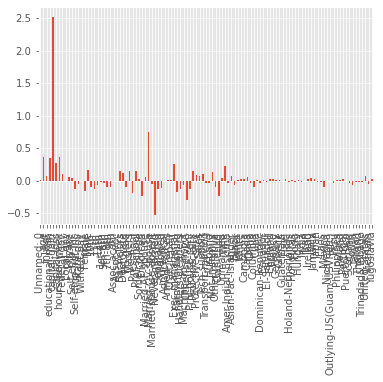

In [54]:
### basic plot

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df_2.columns)
weights.plot(kind='bar')
plt.show()

Although the information is present in the plot above, an interactive plot with clearer labels would assist in our endeavor. Additionally, at this point, we may consider removing variables based on correlation and relevancy (or lack thereof).

In [55]:

### import relevant packages
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=1, solver='liblinear') 

### create pipline
piped_object = Pipeline([('scale', std_scl), 
                         ('logit_model', lr_clf)])

weights = []
# run pipline c-v
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)


In [56]:
import plotly

### build interactive plot depicting weights with error bars
plotly.offline.init_notebook_mode()

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': df_2.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

ModuleNotFoundError: No module named 'plotly'

### Create Support Vector Machines Model

In [57]:
### for loop to set train and test sets for one iteration
for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

### SVM Parameter Adjustments
In this step, we will use SVMs on the data and try different cost parameters. For the first pass, a cost of 1 was used, and like the logistic regression model, no adjustment of cost caused a meangingful difference in the results (values of .05, .5, 1, and 2 were tried). Also compared was a model using a gamma of 1 / n_features (auto) and a scaled gamma model. The scaled gamma model was chosen as the final model but only appears to cause a small improvement in overall accuracy. 

In [58]:
### import relevant function
from sklearn.svm import SVC

### train model
svm_clf = SVC(C=1, kernel='rbf', degree=3, gamma='auto') 
svm_clf.fit(X_train_scaled, y_train)  # train svm_clf

y_hat = svm_clf.predict(X_test_scaled) # get test predictions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('gamma auto accuracy:', acc )
print(conf)

### scaled model training
svm_clf = SVC(C=1, kernel='rbf', degree=3, gamma='scale') 
svm_clf.fit(X_train_scaled, y_train)  # train svm_clf

y_hat = svm_clf.predict(X_test_scaled) # get test predictions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('gamma scale accuracy:', acc )
print(conf)

tn, fp, fn, tp = mt.confusion_matrix(y_test,y_hat).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("specificity:", specificity)
print('sensitivity:', sensitivity)


gamma auto accuracy: 0.8461538461538461
[[6363  419]
 [ 971 1282]]
gamma scale accuracy: 0.8465965688987271
[[6367  415]
 [ 971 1282]]
specificity: 0.9388086110291949
sensitivity: 0.5690190856635597


In [59]:
### display support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(13715, 105)
(13715,)
[7399 6316]


Here, we analyze the instances chosen as support vectors and the support for the vectors.

In [60]:
### df of train
df_tested_on = df_1.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income'] = y[svm_clf.support_] # add back 'income' column to df
df_1['income'] = y # add back income for original data
df_support.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13715 entries, 7709 to 39713
Columns: 106 entries, Unnamed: 0 to Yugoslavia
dtypes: int64(7), uint8(99)
memory usage: 2.1 MB


### Visualize KDE

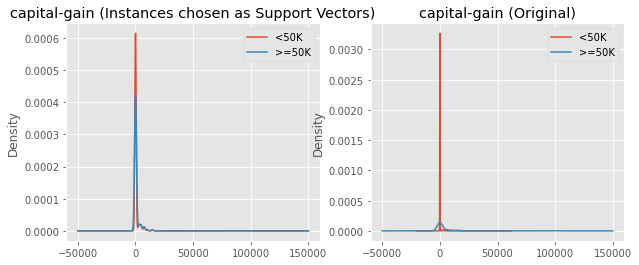

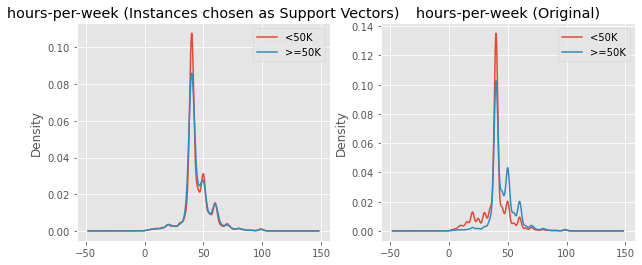

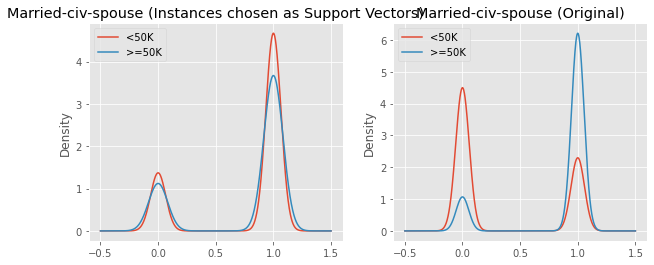

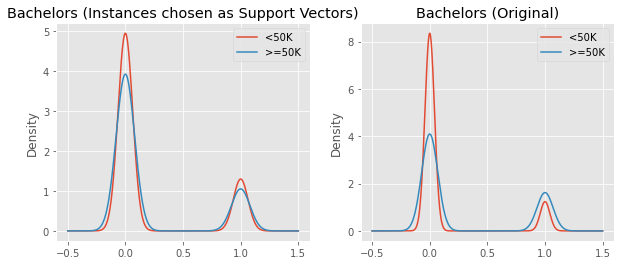

In [61]:
### import relevant function
from pandas.plotting import boxplot

### group original data and SVs
df_grouped_support = df_support.groupby(['income'])
df_grouped = df_1.groupby(['income'])

# plot KDE of variables that stood out in weight
vars_to_plot = ['capital-gain','hours-per-week','Married-civ-spouse','Bachelors']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<50K','>=50K'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<50K','>=50K'])
    plt.title(v+' (Original)')

# Model Comparison (Advantages and Disadvantages)

### Performance

Both models provided similar accuracy results in predictions, around 84-85%. With an unbalanced dataset like this, sensitivity is the harder score to optimize for, but also theoretically the most useful. In this case the Logistic Regression model provided better performance identifying those with an income > 50k. 

* Logistic Regression Specificity: 0.9332544028414977
* Logistic Regression Sensitivity: 0.6154521510096576

* SVM Specificity: 0.9400621577623206
* SVM Sensitivity: 0.5842844600526778


### Efficiency

The logistic regression model is significantly more effectient, completely in typically a few seconds from this machine, compared to 2-3 minutes of the SVM model. The speed also allows for better cross validation to be more confident in the results. 

### Interpretability

The logistic regression model also provides usefulness in how easily it is to interpret the weights and what the model is doing to those without background knowledge, providing an additional use case of the model. This provides some interesting insights, such as how influential having a civilian spouse is on predicting income. 